In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('./bike-rentals')

In [3]:
bike_rentals.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
bike_rentals.rename(columns={'mnth':'month', 'atemp':'feeltemp', 'hum':'humidity'}, inplace=True)

####Descriptive Analysis

In [5]:
bike_rentals.describe()

,day,month,year,season,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.738714,6.519836,2011.500684,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,8.809949,3.451913,0.500342,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,8.000000,4.000000,2011.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,16.000000,7.000000,2012.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,23.000000,10.000000,2012.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,31.000000,12.000000,2012.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


####Check for Null

In [6]:
bike_rentals[bike_rentals.isnull().any(axis=1)]

,day,month,year,season,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,rentals


####Separate Categorical and Numeric Features

In [7]:
numeric_features = ['temp', 'feeltemp', 'humidity', 'windspeed']
categorical_features = ['day', 'month', 'year', 'season', 'holiday', 'weekday', 'workingday', 'weathersit']
label = bike_rentals.rentals

####Plot Numeric Features

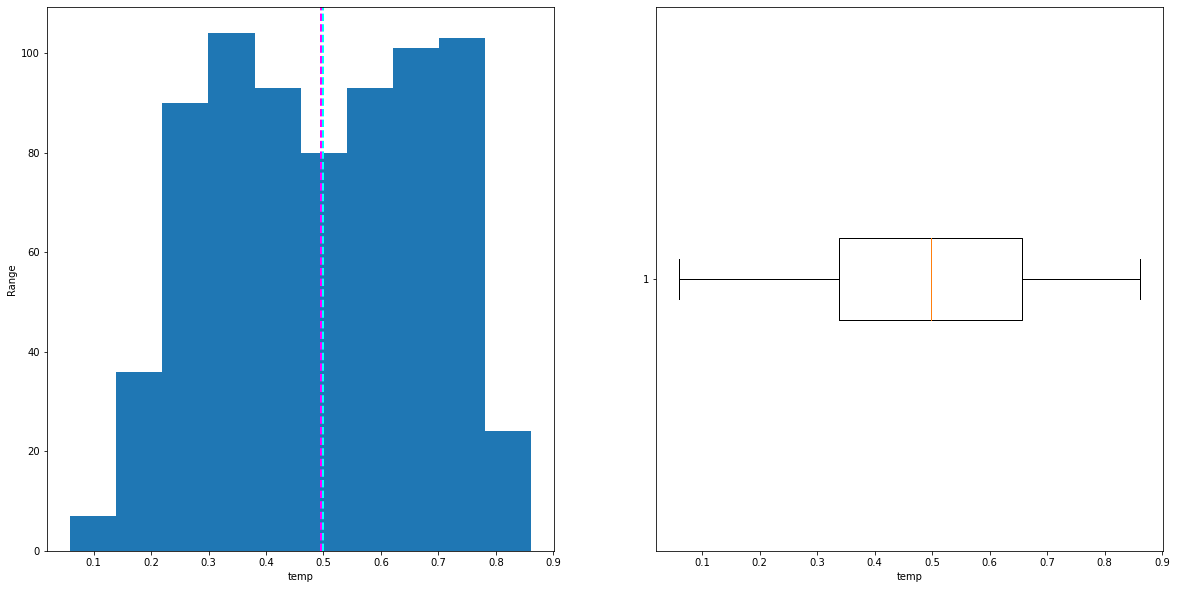

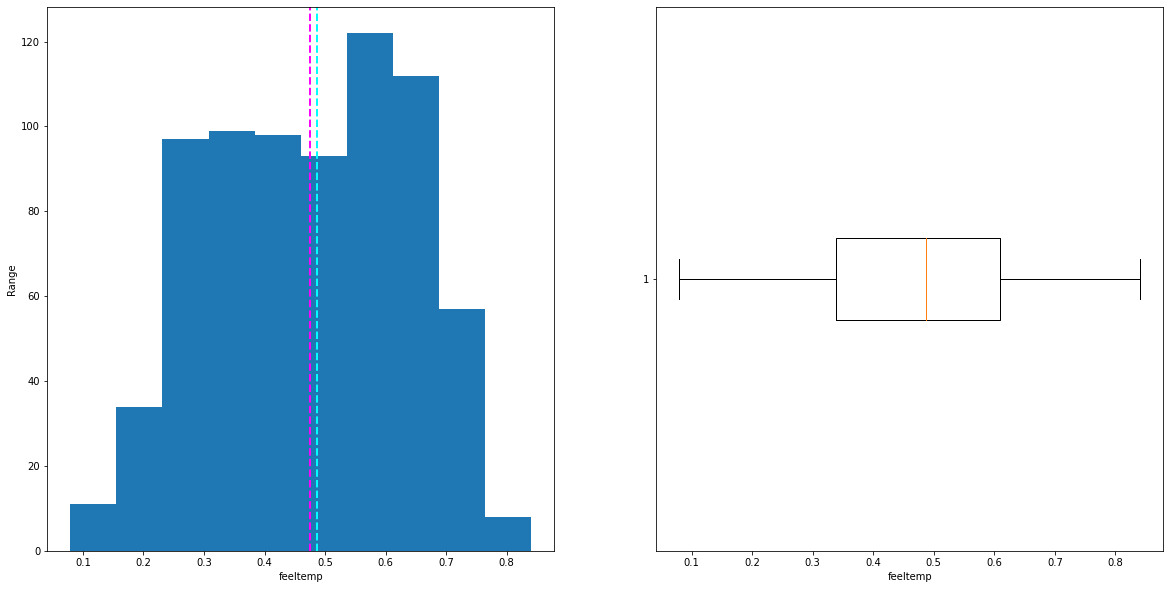

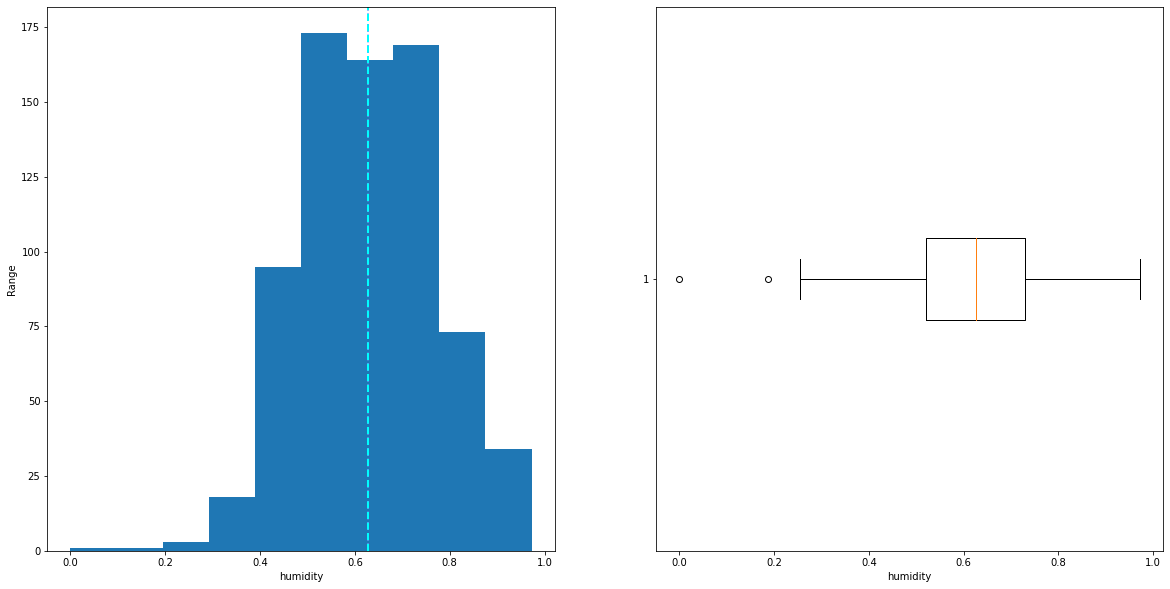

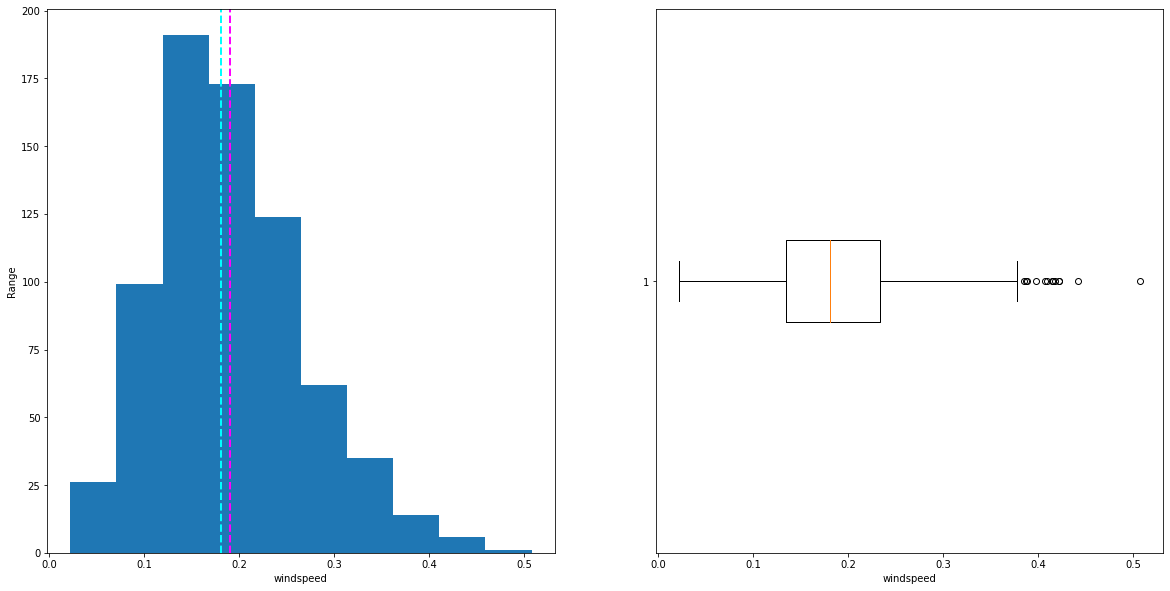

In [8]:
for col in numeric_features:
    fig, ax = plt.subplots(1, 2, figsize = (20,10))
    
    ax[0].hist(bike_rentals[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Range')
    ax[0].axvline(bike_rentals[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(bike_rentals[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    
    ax[1].boxplot(bike_rentals[col], vert=False)
    ax[1].set_xlabel(col)
    
fig.show()

####Plot Categorical Features

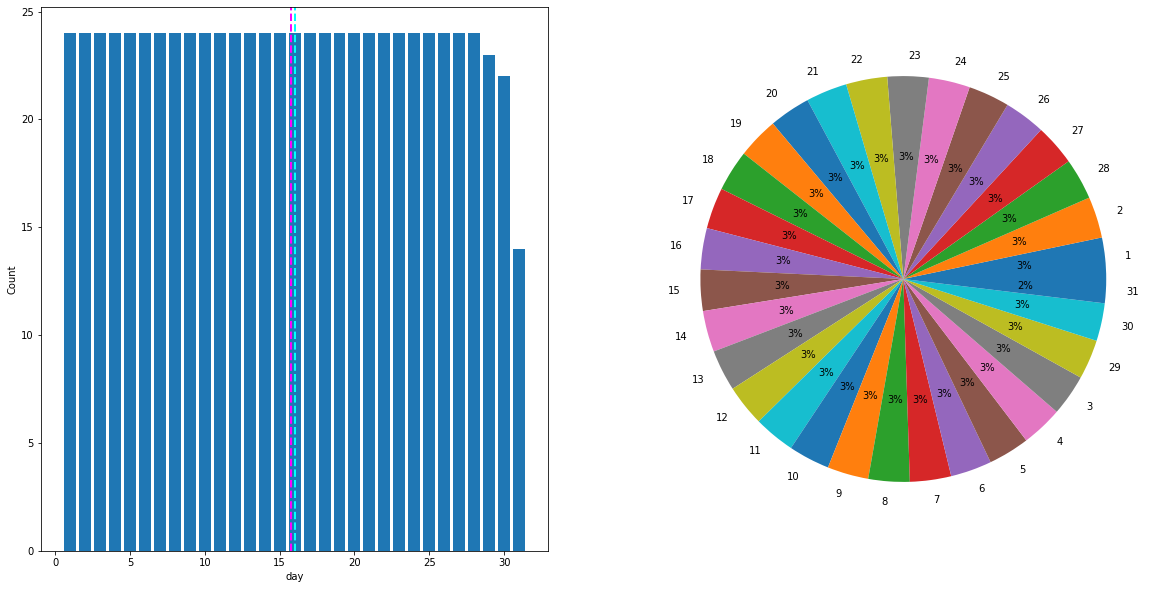

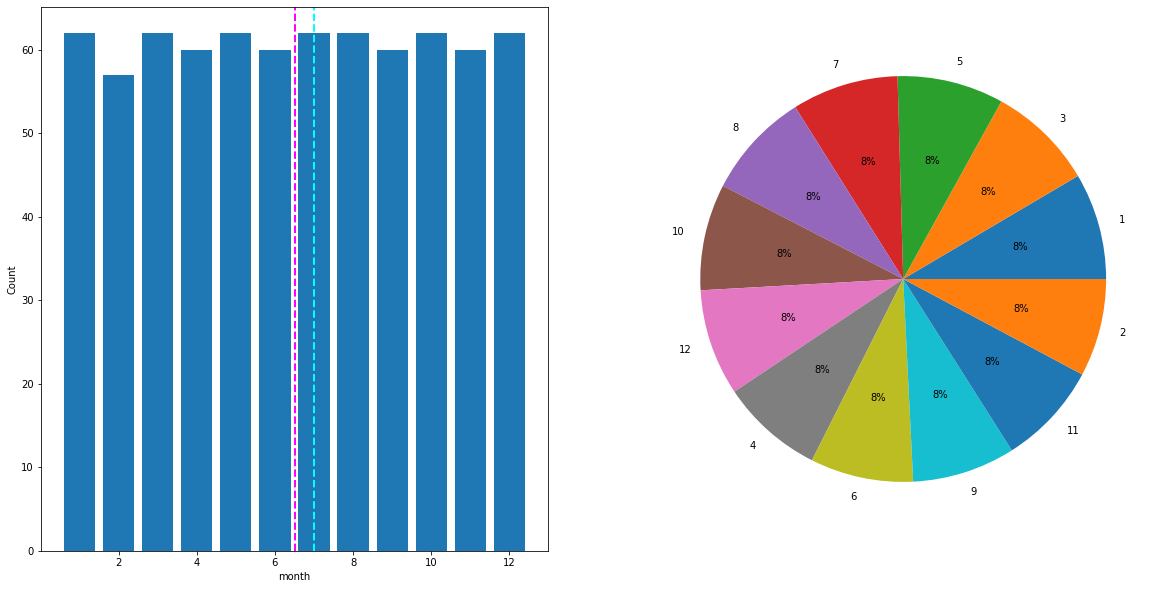

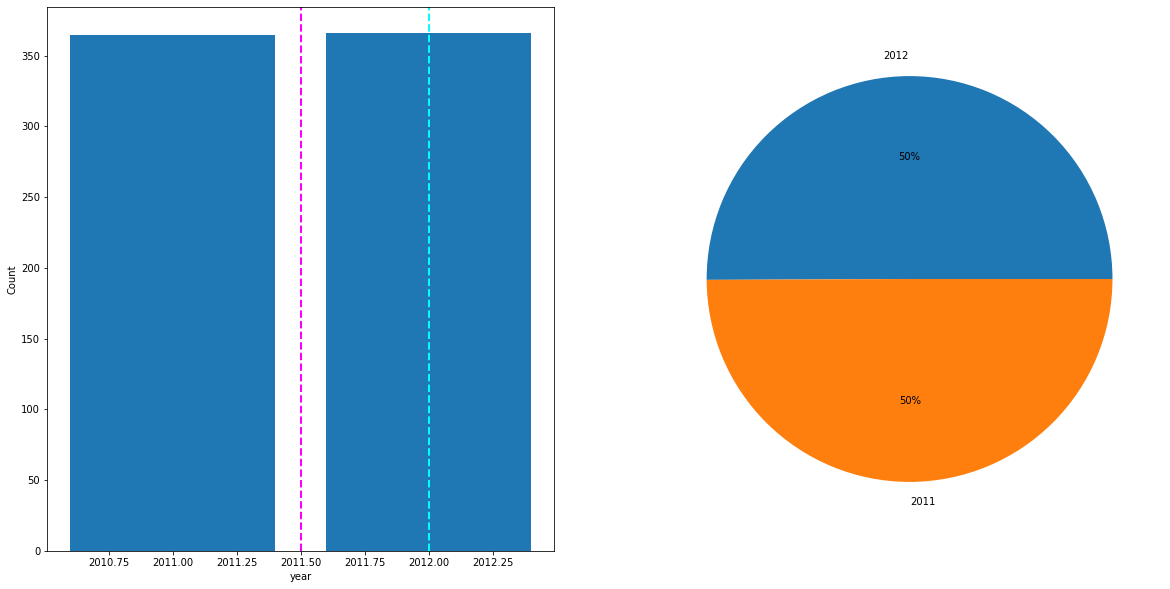

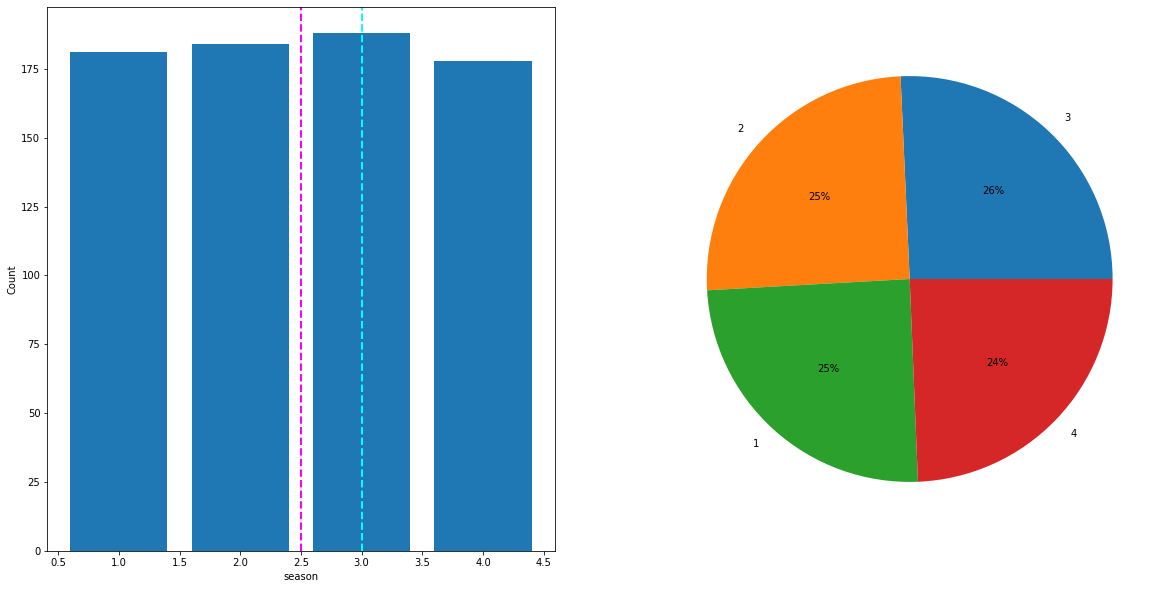

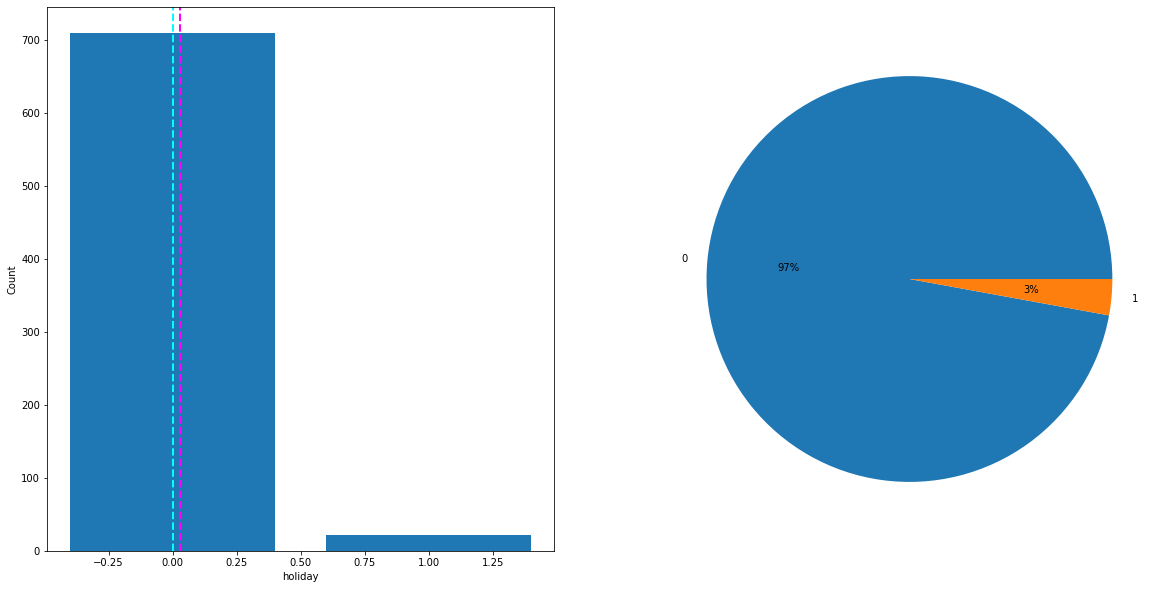

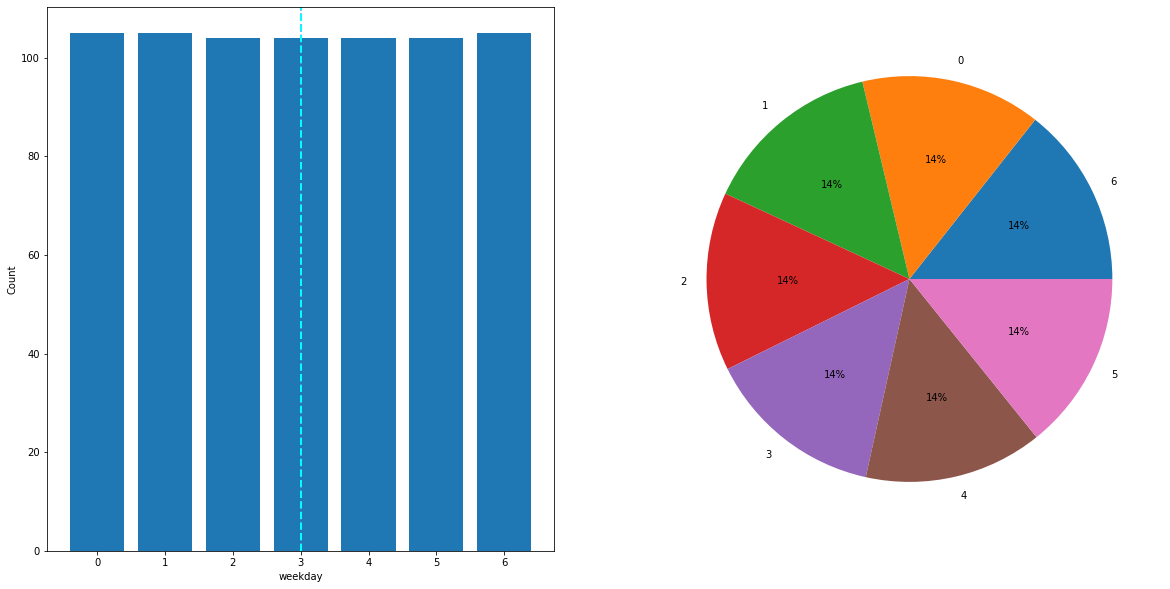

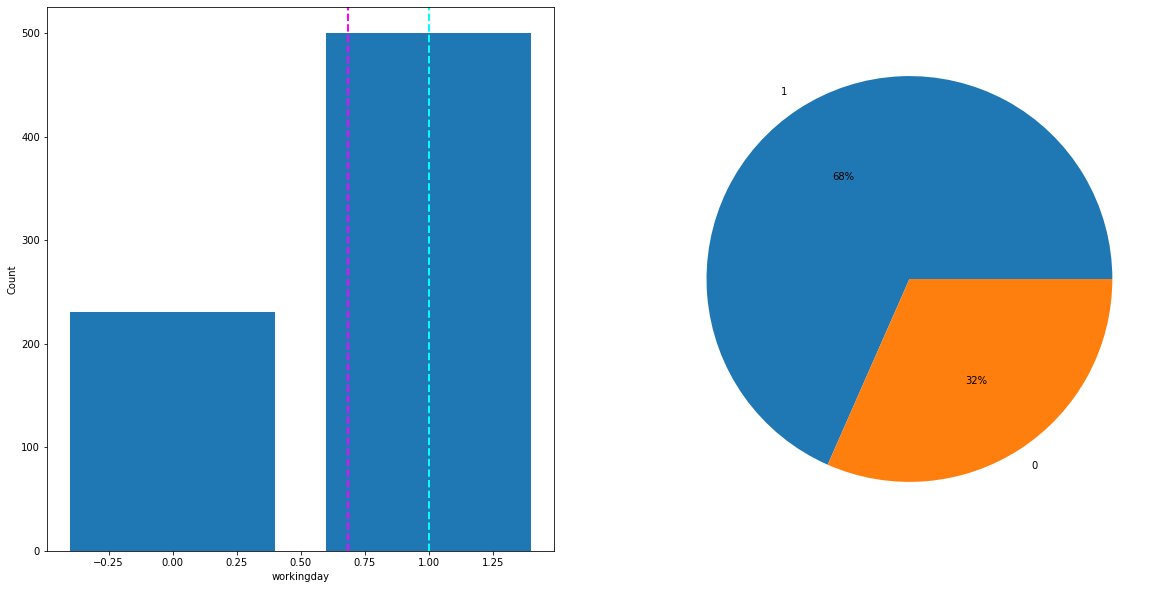

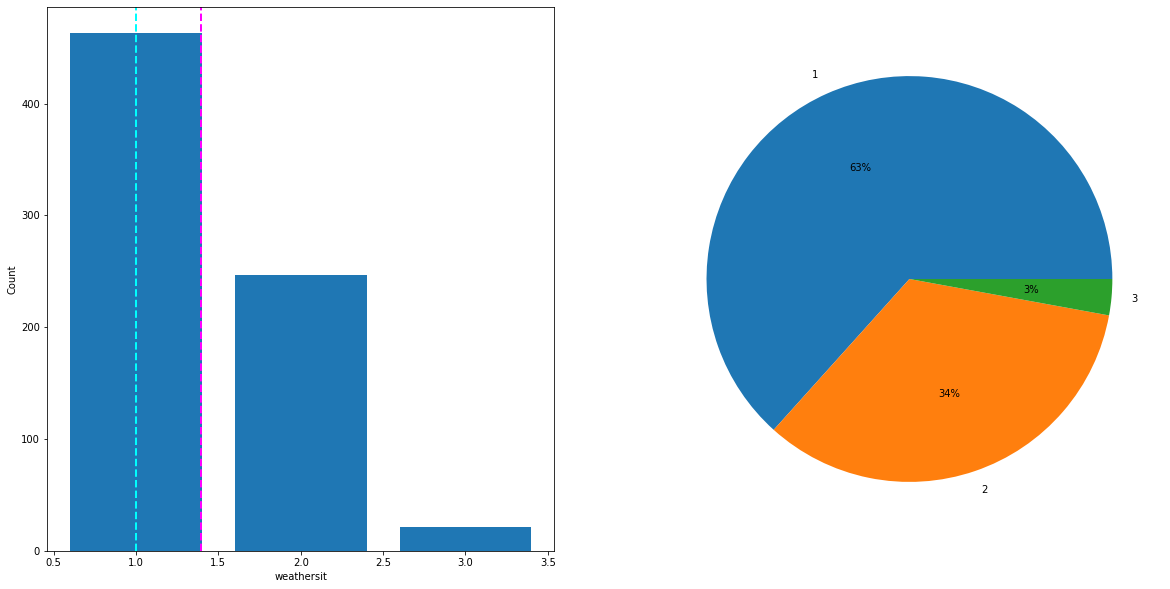

In [9]:
for col in categorical_features:
    fig, ax = plt.subplots(1, 2, figsize = (20,10))
    category_count = dict(bike_rentals[col].value_counts())
    ax[0].bar(list(category_count.keys()), list(category_count.values()))
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')
    ax[0].axvline(bike_rentals[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(bike_rentals[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    
    ax[1].pie(list(category_count.values()), labels=list(category_count.keys()), autopct='%1.0f%%')
    
fig.show()

####Plot Label

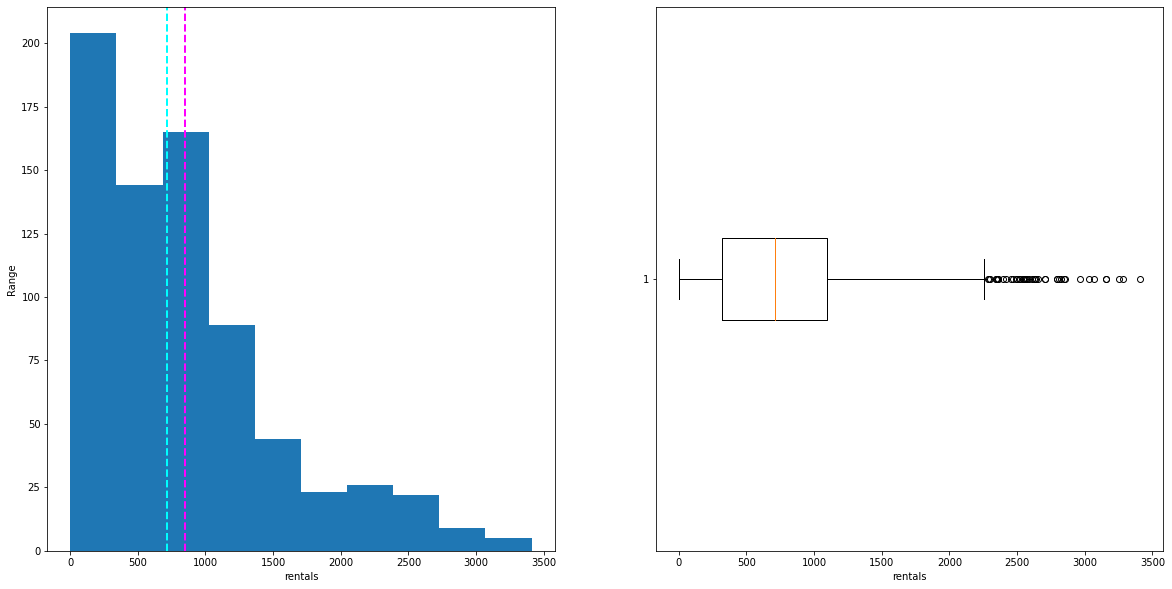

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))

ax[0].hist(bike_rentals[label.name])
ax[0].set_xlabel(label.name)
ax[0].set_ylabel('Range')
ax[0].axvline(bike_rentals[label.name].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(bike_rentals[label.name].median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(bike_rentals[label.name], vert=False)
ax[1].set_xlabel(label.name)
    
fig.show()

####Plot Correlation Between Label and Features

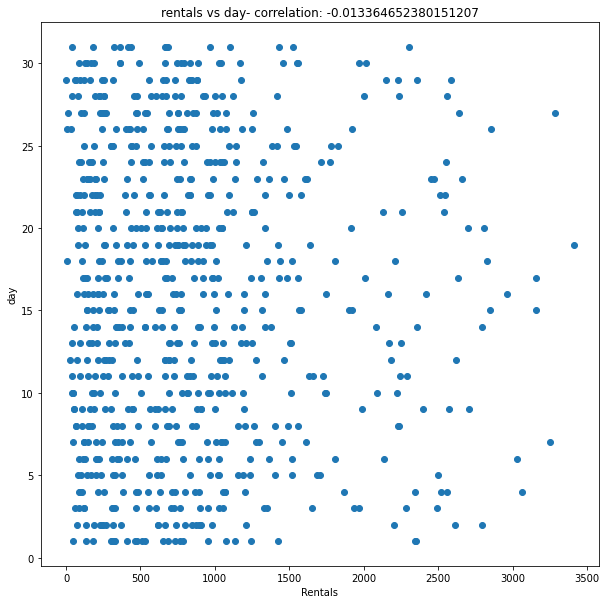

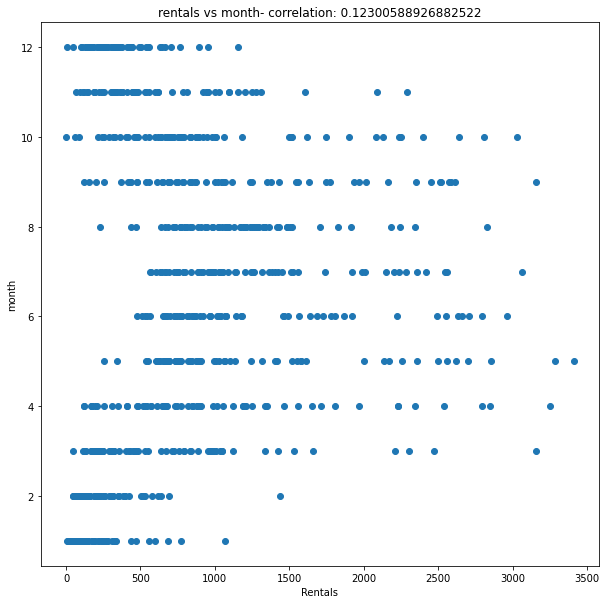

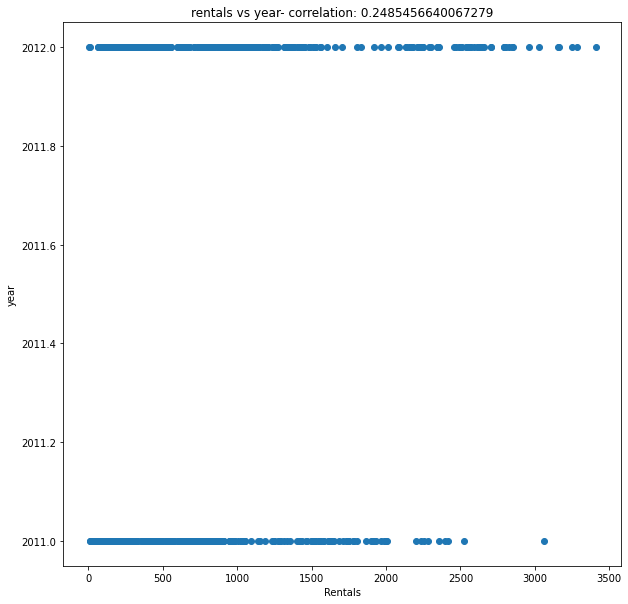

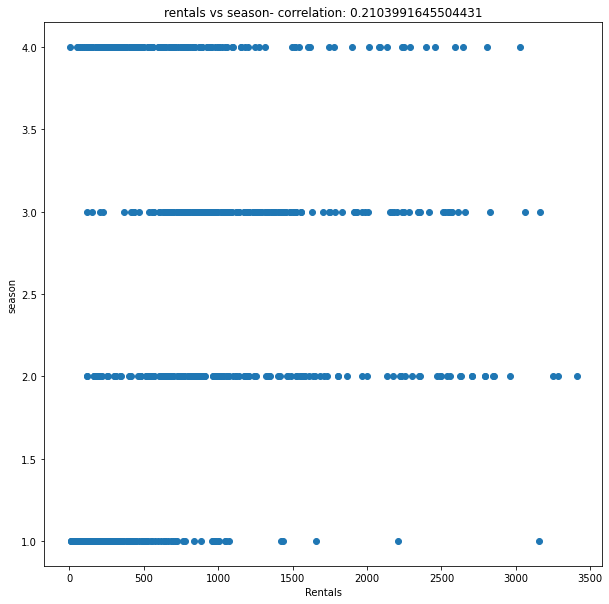

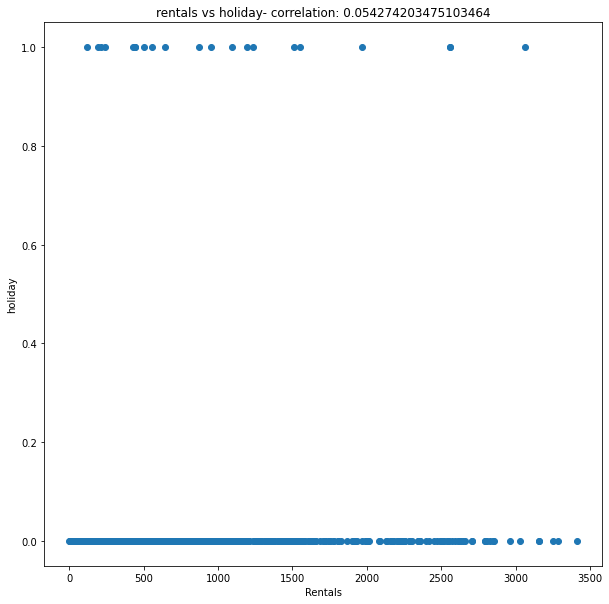

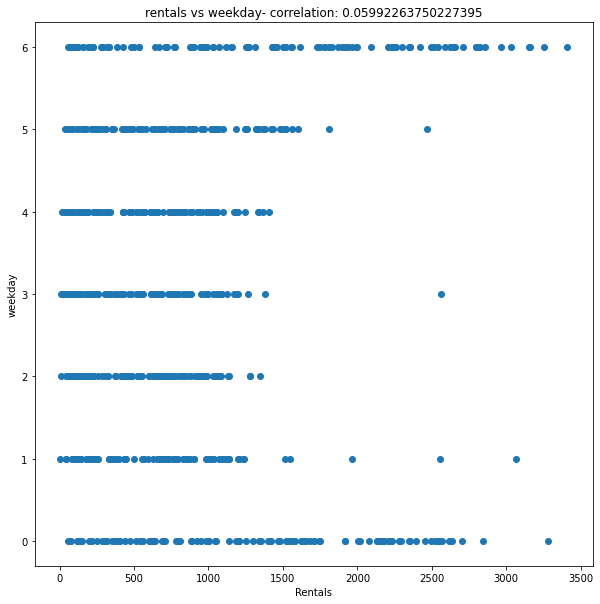

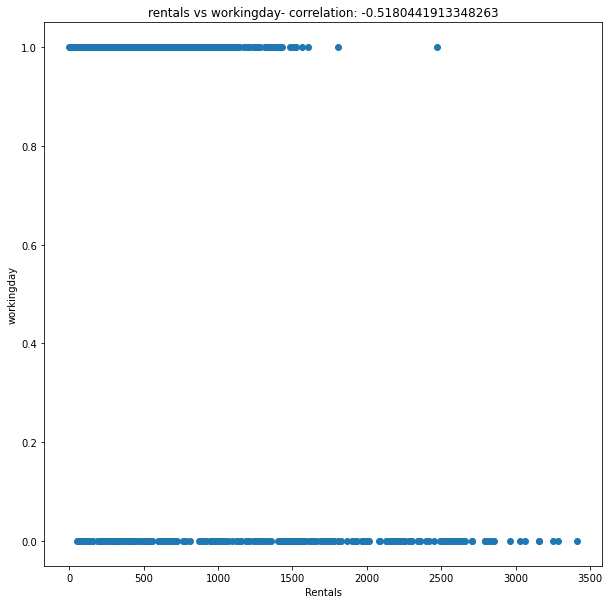

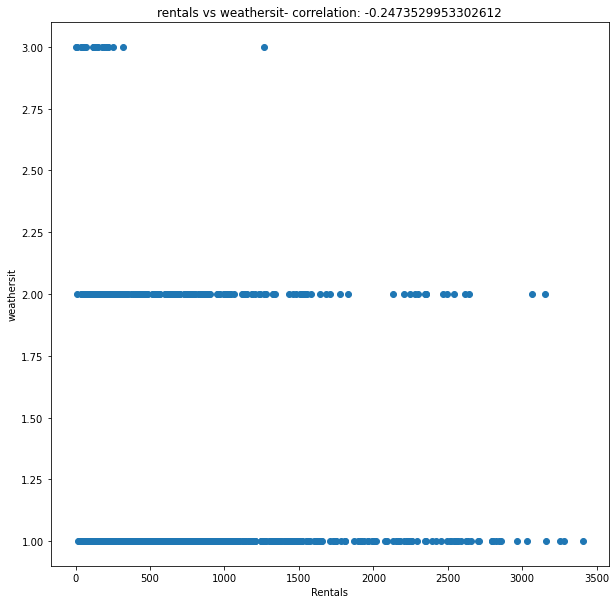

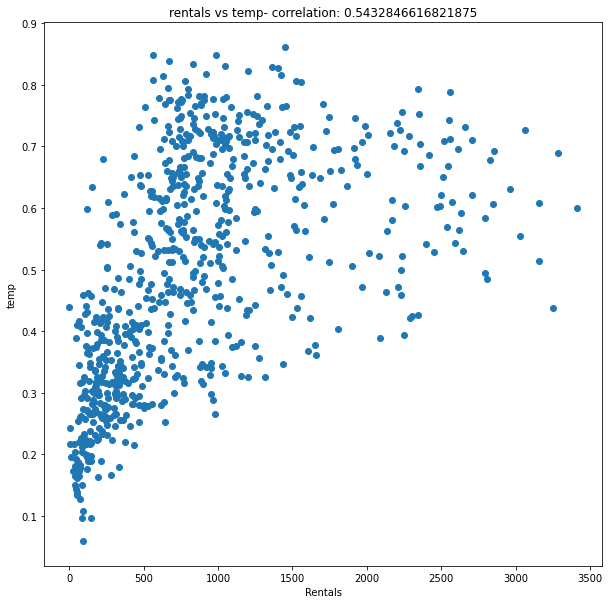

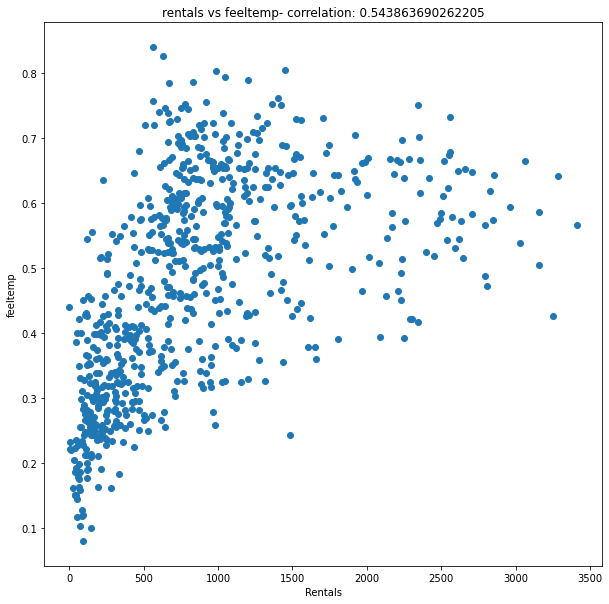

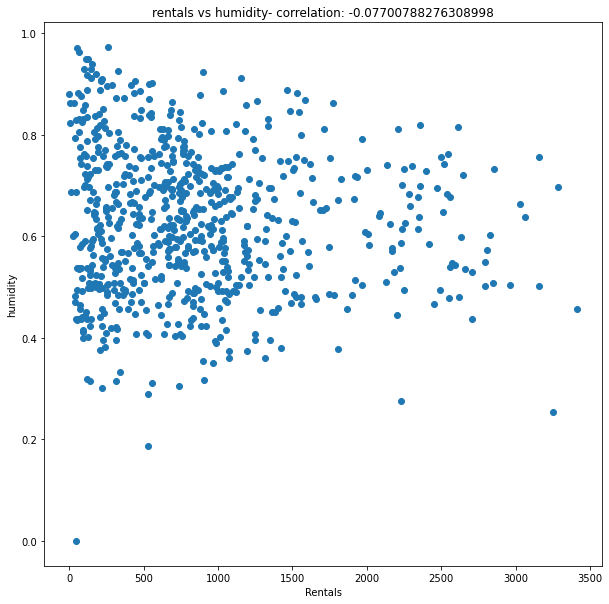

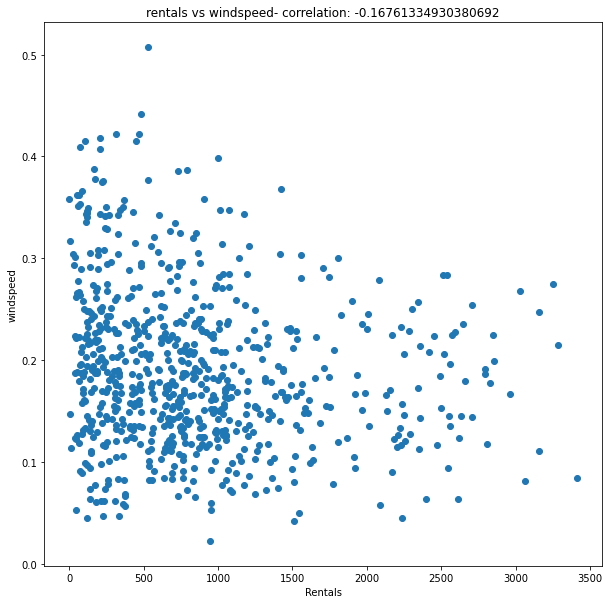

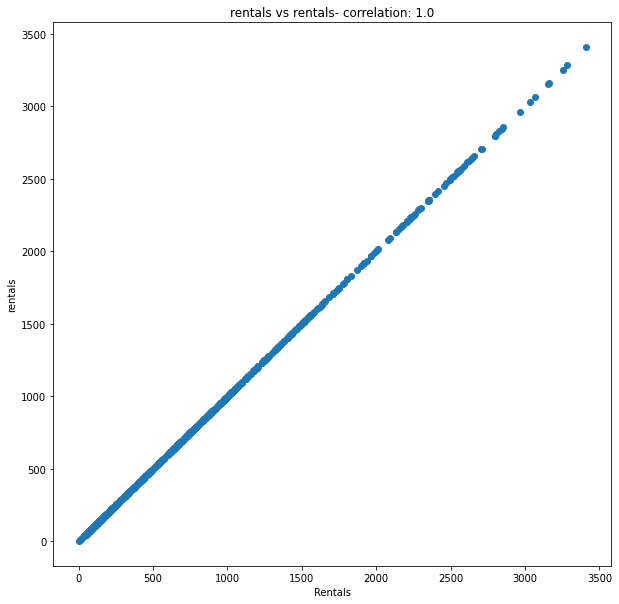

In [11]:
for col in bike_rentals.columns:
    fig = plt.figure(figsize=(10,10))

    plt.scatter(x=bike_rentals.rentals, y=bike_rentals[col])
    plt.xlabel('Rentals')
    plt.ylabel(col)
    correlation = bike_rentals[col].corr(bike_rentals.rentals)
    plt.title('rentals vs ' + col + '- correlation: ' + str(correlation))
    
plt.show()

####Train Test Split

In [12]:
feature, label = bike_rentals.drop('rentals',axis=1,inplace=False).values, bike_rentals.rentals.values
feature_test, feature_train, label_test, label_train = train_test_split(feature,label,test_size=0.8,random_state=42)
feature_train.shape, label_train.shape

((585, 12), (585,))

####Pre Processing Data and Train Simple Linear Regression model

In [21]:
categorical_features = [0,1,2,3,4,5,6,7]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = [8,9,10,11]
numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[
                                            ('numeric', numerical_transformer, numerical_features),
                                            ('categorical', categorical_transformer, categorical_features)
                                            ])
model_pipeline = Pipeline(steps=[('preprocessing', preprocessor),
                                ('model', LinearRegression())])
model_pipeline.fit(feature_train,(label_train))
print('Predicted:', model_pipeline.predict(feature_test[0].reshape(1,-1)).item(), 'GT:', label_test[0])

Predicted: 2076.9388980260496 GT: 3160


####Evaluate linear model performance

In [22]:
err = mean_squared_error(label_test,model_pipeline.predict(feature_test))
r2 = r2_score(label_test, model_pipeline.predict(feature_test))
print('rmse:',sqrt(err), 'r2:',r2)

rmse: 388.68773123840293 r2: 0.67205296171468


####Linear model graph

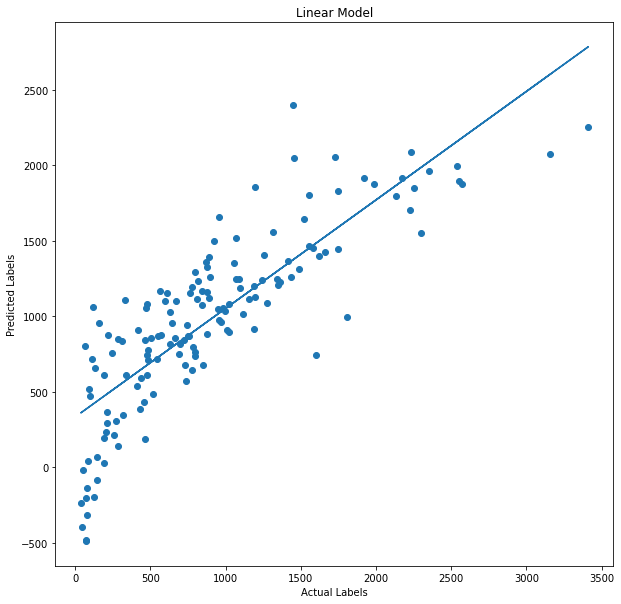

In [23]:
predictions = model_pipeline.predict(feature_test)
fig = plt.figure(figsize=(10,10))
plt.scatter(x=label_test,y=predictions)
z = np.polyfit(label_test, predictions, 1)
p = np.poly1d(z)
plt.plot(label_test,p(label_test))
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Linear Model')
plt.show()

####Train Random Forest

In [24]:
model_pipeline = Pipeline(steps=[('preprocess', preprocessor),
                                ('model', RandomForestRegressor())])
model_pipeline.fit(feature_train,label_train)
print('Predicted:', model_pipeline.predict(feature_test[0].reshape(1,-1)).item(), 'GT:', label_test[0])

Predicted: 2492.73 GT: 3160


####Evaluate random forest 

In [25]:
err = mean_squared_error(label_test,model_pipeline.predict(feature_test))
r2 = r2_score(label_test,model_pipeline.predict(feature_test))
print ('rmse:', sqrt(err), 'r2:', r2)

rmse: 351.3014125596968 r2: 0.732106707325421


####Random Forest Graph

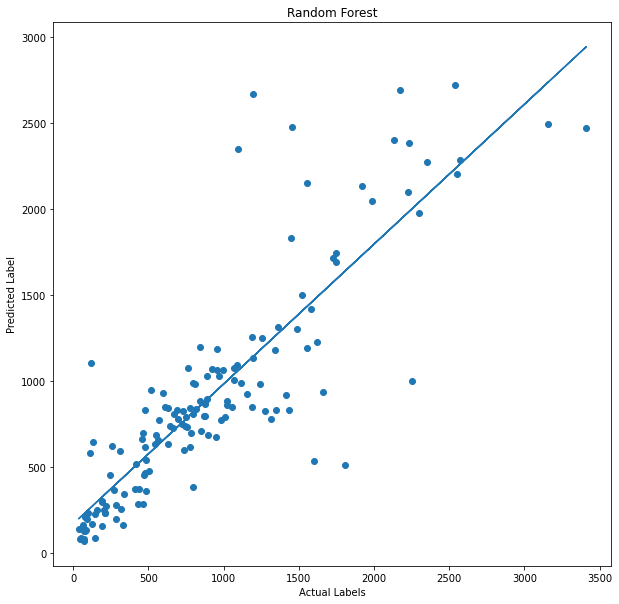

In [26]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=label_test,y=model_pipeline.predict(feature_test))
z = np.polyfit(label_test,model_pipeline.predict(feature_test), deg=1)
p = np.poly1d(z)
plt.plot(label_test,p(label_test))
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Label')
plt.title('Random Forest')
plt.show()